In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/kaggle/input/customer-propensity-to-purchase-data/training_sample.csv')
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

We can see that all features contain integers. UseID is not necessary for our predictions so we can drop the column.

In [4]:
new_df = df.drop('UserID', axis=1)
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [5]:
mis_vals = []
cardinality = []
percent_missing = []
total = len(df)
modes1 = list()
modes2 = list()
freq1 = list()
freq2 = list()
mode1_p = list()
mode2_p = list()
for col in new_df.columns:
    missing = df[col].isnull().sum()
    mis_vals.append(missing)
    card = df[col].nunique()
    cardinality.append(card)
    percent_miss = round((missing/total)*100,2)
    percent_missing.append(percent_miss)
    mode1 = df[col].value_counts().index.tolist()[0]
    modes1.append(mode1)
    mode2 = df[col].value_counts().index.tolist()[1]
    modes2.append(mode2)
    mode1_freq = df[col].value_counts().tolist()[0]
    freq1.append(mode1_freq)
    mode2_freq = df[col].value_counts().tolist()[1]
    freq2.append(mode2_freq)
    mode1_perc = round((mode1_freq/total)*100,2)
    mode1_p.append(mode1_perc)
    mode2_perc = round((mode2_freq/total)*100,2)
    mode2_p.append(mode2_perc)
    print(f'{col}:\n\tPercent missing: {percent_miss}%'
          f'\n\tCardinality: {card}'
          f'\n\tMissing: {missing}'
          f'\n\tmode:{mode1}'
          f'\n\t2nd mode: {mode2}'
          f'\n\tfrequency: {mode1_freq}'
          f'\n\t2ndfrequency: {mode2_freq}'
          f'\n\tmode %: {mode1_perc}'
          f'\n\t2nd mode %: {mode2_perc}')
    

basket_icon_click:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 410248
	2ndfrequency: 45153
	mode %: 90.09
	2nd mode %: 9.91
basket_add_list:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 421464
	2ndfrequency: 33937
	mode %: 92.55
	2nd mode %: 7.45
basket_add_detail:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 403979
	2ndfrequency: 51422
	mode %: 88.71
	2nd mode %: 11.29
sort_by:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 438620
	2ndfrequency: 16781
	mode %: 96.32
	2nd mode %: 3.68
image_picker:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 443226
	2ndfrequency: 12175
	mode %: 97.33
	2nd mode %: 2.67
account_page_click:
	Percent missing: 0.0%
	Cardinality: 2
	Missing: 0
	mode:0
	2nd mode: 1
	frequency: 453775
	2ndfrequency: 1626
	mode %: 99.64
	2nd mode %: 0.36
promo_banner_click:
	Percent mis

In [6]:
"""columns = ['Feature', 'Count', '% of Missing', 'Cardinality', 'Mode', 'Mode Frequency', 'Mode %', '2nd Mode', '2nd Mode Frequency', '2nd Mode %']
features = new_df.columns

print("DATA QUALITY REPORT")

dqr = pd.read_csv('/kaggle/input/dqr-template-file/dqr.csv', names=columns)
for item in dqr:
    for i in range(len(features)):
        if item == 'Feature':
            dqr.loc[i:i,item] = features[i]
        elif item == 'Count':
            dqr.loc[i:i,item] = len(df[features[i]])
        elif item == '% of Missing':
            dqr.loc[i:i,item] = percent_missing[i]
        elif item == 'Cardinality':
            dqr.loc[i:i,item] = cardinality[i]
        elif item == 'Mode':
            dqr.loc[i:i,item] = modes1[i]
        elif item == 'Mode Frequency':
            dqr.loc[i:i,item] = freq1[i]
        elif item == 'Mode %':
            dqr.loc[i:i,item] = mode1_p[i]
        elif item == '2nd Mode':
            dqr.loc[i:i,item] = modes2[i]
        elif item == '2nd Mode Frequency':
            dqr.loc[i:i,item] = freq2[i]
        elif item == '2nd Mode %':
            dqr.loc[i:i,item] = mode2_p[i]
dqr"""

'columns = [\'Feature\', \'Count\', \'% of Missing\', \'Cardinality\', \'Mode\', \'Mode Frequency\', \'Mode %\', \'2nd Mode\', \'2nd Mode Frequency\', \'2nd Mode %\']\nfeatures = new_df.columns\n\nprint("DATA QUALITY REPORT")\n\ndqr = pd.read_csv(\'/kaggle/input/dqr-template-file/dqr.csv\', names=columns)\nfor item in dqr:\n    for i in range(len(features)):\n        if item == \'Feature\':\n            dqr.loc[i:i,item] = features[i]\n        elif item == \'Count\':\n            dqr.loc[i:i,item] = len(df[features[i]])\n        elif item == \'% of Missing\':\n            dqr.loc[i:i,item] = percent_missing[i]\n        elif item == \'Cardinality\':\n            dqr.loc[i:i,item] = cardinality[i]\n        elif item == \'Mode\':\n            dqr.loc[i:i,item] = modes1[i]\n        elif item == \'Mode Frequency\':\n            dqr.loc[i:i,item] = freq1[i]\n        elif item == \'Mode %\':\n            dqr.loc[i:i,item] = mode1_p[i]\n        elif item == \'2nd Mode\':\n            dqr.loc[i

Every feature's cardinality is 2 so we know that the value is either 0 or 1, therefore no normalization is needed and no outliers are present.

Next, let's try to filter out unimportant features using the Chi-Square test.

In [7]:
from sklearn.feature_selection import chi2

X = new_df.drop(columns='ordered')
y = new_df['ordered']

chi_scores = chi2(X,y)

chi_scores

(array([7.52682557e+04, 3.48768184e+04, 6.93808424e+04, 1.30931917e+03,
        2.26537987e+03, 1.48878713e+03, 1.43184576e+03, 2.50964113e+02,
        8.40617614e+03, 8.77307552e+03, 2.72258524e+05, 1.59656129e+03,
        1.83811194e+05, 2.10579577e+05, 2.59353867e+01, 4.48252173e+02,
        3.04151149e+02, 8.04875863e+03, 2.67689696e+02, 8.88563693e+02,
        1.13898313e+02, 7.69984766e+02, 3.04483250e+01]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.06669420e-286,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.60050059e-056,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 3.53037795e-007, 1.73178032e-099,
        4.10578356e-068, 0.00000000e+000, 3.61774346e-060, 3.00575781e-195,
        1.37165290e-026, 1.81162860e-169, 3.42879262e-008]))

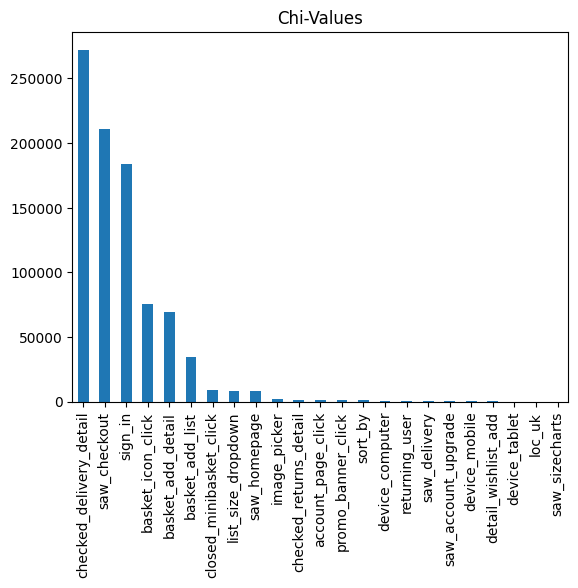

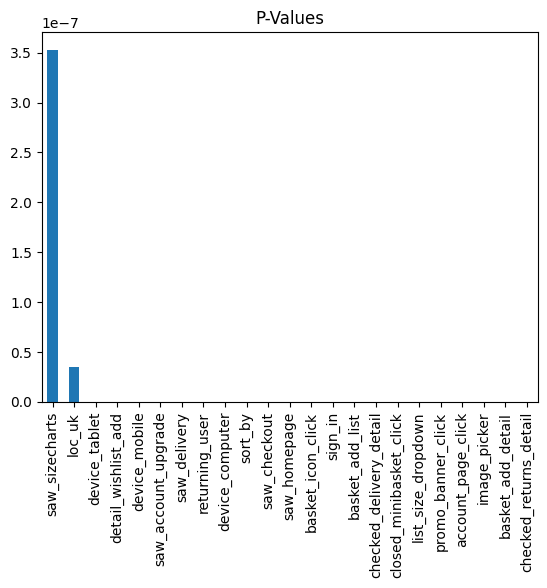

In [8]:
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()
plt.title("Chi-Values")
plt.show()
p_values.plot.bar()
plt.title("P-Values")
plt.show()

'saw_sizecharts', 'loc_uk', and 'device_tablet' are the top 3 unimportant features so we will drop these.

The device features also scored on the unimportant side, and they don't matter much for what we are trying to build our models upon so we will drop these too.

In [9]:
drop_cols=['saw_sizecharts','loc_uk','device_tablet','device_mobile','device_computer']
new_df = new_df.drop(columns=drop_cols)

In [10]:
new_df.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_delivery,saw_account_upgrade,saw_homepage,returning_user,ordered
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1


In [11]:
ordered = new_df[new_df['ordered'] ==  1]
not_ordered = new_df[new_df['ordered'] == 0]

Creating an undersampled dataset from training data. All records from class 1 of ordered included in each training subset, and a random selection of an equal amount from class 0 for a 50/50 split. 

In [12]:
from sklearn.model_selection import train_test_split  

X = new_df.drop(['ordered'], axis=1) 
y = new_df['ordered'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
y_train.value_counts()

ordered
0    349013
1     15307
Name: count, dtype: int64

# KFold And Undersampling Function

In [14]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

def score_model(model, X_train, y_train, params=None, cv=None):
    """
    Creates folds manually, and undersamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
   
    recall_scores, f1_scores, acc_scores, roc_scores = [], [], [], []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # the training data
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        # the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        
        class_count = np.count_nonzero(y_train_fold == 1) 
        
        sampling_strategy = {0:class_count, 1:class_count}
        
        rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    
        # Undersample only the data in the training section
        X_train_fold_undersample, y_train_fold_undersample = rus.fit_resample(X_train_fold, y_train_fold)
        
        #print(y_train_fold_undersample.value_counts())
        
        # Fit the model on the undersampled training data
        model_obj = model(**params).fit(X_train_fold_undersample, y_train_fold_undersample)
        
        # Score the model on the (non-undersampled) validation data
        pred = model_obj.predict(X_val_fold)
        pred_prob = model_obj.predict_proba(X_val_fold)[:,1]
        
        rc_score = recall_score(y_val_fold, pred)
        f_score = f1_score(y_val_fold, pred)
        acc_score = accuracy_score(y_val_fold, pred)
        auc_score = roc_auc_score(y_val_fold, pred_prob)
        
        recall_scores.append(rc_score)
        f1_scores.append(f_score)
        acc_scores.append(acc_score)
        roc_scores.append(auc_score)
    return np.array(recall_scores), np.array(f1_scores), np.array(acc_scores), np.array(roc_scores)

# Hyper Parameterization Function

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB

def param_optimizer(model, params, X_train, y_train):
    score_tracker = []
    for p1 in params['p1']:
        for p2 in params['p2']:
            if model == RandomForestClassifier:
                _params = {
                    'n_estimators': p1,
                    'max_depth': p2,
                    'random_state': 13
                }
            elif model == AdaBoostClassifier:
                _params = {
                    'n_estimators': p1,
                    'learning_rate': p2,
                    'random_state': 13
                }
            elif model == BernoulliNB:
                _params = {
                    'alpha': p1,
                    'fit_prior': p2
                }
            _params['recall'], _params['f1'], _params['acc'], _params['roc'] = score_model(model, X_train, y_train, _params)
            
            _params['recall'] = _params['recall'].mean() 
            _params['f1'] = _params['f1'].mean()
            _params['acc'] = _params['acc'].mean()
            _params['roc'] = _params['roc'].mean()
            
            
            score_tracker.append(_params)
            
    def best_model(metric):
        return sorted(score_tracker, key=lambda x: x[metric], reverse=True)[0]
    
    # What's the best model?
    return best_model('recall'),best_model('f1'),best_model('acc'),best_model('roc')


### RandomForest Hyper-Parameterization

In [16]:
rf_params = {
    'p1': [50, 100, 200],
    'p2': [4, 6, 10, 12],
}

param_optimizer(RandomForestClassifier, rf_params, X_train, y_train)

# This output shows the best parameters to use based on
# specific metrics. Outputs are in this order: recall score,
# f1 score, accuracy score, roc score.

({'n_estimators': 50,
  'max_depth': 4,
  'random_state': 13,
  'recall': 0.9953737536228319,
  'f1': 0.8457919681001995,
  'acc': 0.984705753184014,
  'roc': 0.997052047771},
 {'n_estimators': 100,
  'max_depth': 6,
  'random_state': 13,
  'recall': 0.9924921630953227,
  'f1': 0.903750320827033,
  'acc': 0.991114953886693,
  'roc': 0.9971866215272038},
 {'n_estimators': 100,
  'max_depth': 6,
  'random_state': 13,
  'recall': 0.9924921630953227,
  'f1': 0.903750320827033,
  'acc': 0.991114953886693,
  'roc': 0.9971866215272038},
 {'n_estimators': 50,
  'max_depth': 6,
  'random_state': 13,
  'recall': 0.9929533846410907,
  'f1': 0.8950478796419084,
  'acc': 0.9902119016249451,
  'roc': 0.9971961914627135})

### LogisticRegression

Does not need Hyper-parameterization

### AdaBoost Hyper-Parameterization

In [17]:
adaboost_params = {
    'p1': [50, 100, 200],
    'p2': [0.25, 0.5, 1.0, 2],
}

param_optimizer(AdaBoostClassifier, adaboost_params, X_train, y_train)
# This output shows the best parameters to use based on
# specific metrics. Outputs are in this order: recall score,
# f1 score, accuracy score, roc score.

({'n_estimators': 50,
  'learning_rate': 1.0,
  'random_state': 13,
  'recall': 0.990598236061787,
  'f1': 0.9117713968181643,
  'acc': 0.9919466403162055,
  'roc': 0.9971727530037},
 {'n_estimators': 50,
  'learning_rate': 0.25,
  'random_state': 13,
  'recall': 0.9901386942583322,
  'f1': 0.9180642416626625,
  'acc': 0.9925752086078173,
  'roc': 0.9972223968747652},
 {'n_estimators': 50,
  'learning_rate': 0.25,
  'random_state': 13,
  'recall': 0.9901386942583322,
  'f1': 0.9180642416626625,
  'acc': 0.9925752086078173,
  'roc': 0.9972223968747652},
 {'n_estimators': 100,
  'learning_rate': 0.25,
  'random_state': 13,
  'recall': 0.9904679003230396,
  'f1': 0.9132171127705211,
  'acc': 0.9920921168203778,
  'roc': 0.9972270172552739})

### Naive Bayes Hyper-Parameterization

In [18]:
nb_params = {
    'p1': [0.001, 0.05, 0.1, 0.5, 1],
    'p2': [True, False]
}

param_optimizer(BernoulliNB, nb_params, X_train, y_train)
# This output shows the best parameters to use based on
# specific metrics. Outputs are in this order: recall score,
# f1 score, accuracy score, roc score.

({'alpha': 0.001,
  'fit_prior': True,
  'recall': 0.9956377373076993,
  'f1': 0.7598665978725144,
  'acc': 0.973564448836188,
  'roc': 0.9961826147453096},
 {'alpha': 0.001,
  'fit_prior': True,
  'recall': 0.9956377373076993,
  'f1': 0.7598665978725144,
  'acc': 0.973564448836188,
  'roc': 0.9961826147453096},
 {'alpha': 0.001,
  'fit_prior': True,
  'recall': 0.9956377373076993,
  'f1': 0.7598665978725144,
  'acc': 0.973564448836188,
  'roc': 0.9961826147453096},
 {'alpha': 0.001,
  'fit_prior': True,
  'recall': 0.9956377373076993,
  'f1': 0.7598665978725144,
  'acc': 0.973564448836188,
  'roc': 0.9961826147453096})

# Testing on original dataset

In [19]:
#Undersample training set

class_count = np.count_nonzero(y_train == 1) 
        
sampling_strategy = {0:class_count, 1:class_count}

rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

X_train_undersample, y_train_undersample = rus.fit_resample(X_train, y_train)

### RandomForest

RANDOMFOREST SCORES:
	Accuracy: 0.9901
	F-1: 0.8925
	Recall: 0.9923
	Roc: 0.9972




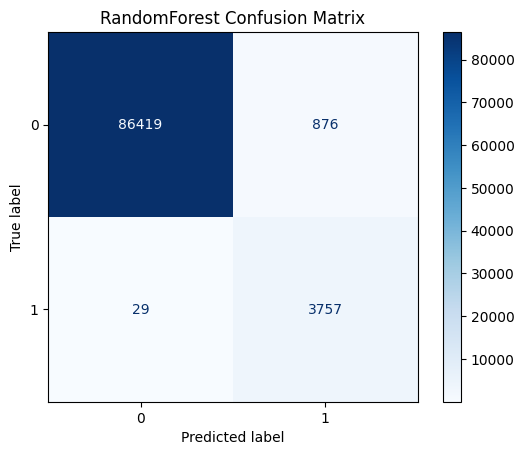

In [20]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 6, random_state = 13)

rf.fit(X_train_undersample, y_train_undersample)

rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
roc = roc_auc_score(y_test, rf_pred_proba)
cm = confusion_matrix(y_test, rf_pred)

print(f'RANDOMFOREST SCORES:\n'
      f'\tAccuracy: {acc:0.4f}\n'
      f'\tF-1: {f1:0.4f}\n'
      f'\tRecall: {recall:0.4f}\n'
      f'\tRoc: {roc:0.4f}\n\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues',)
plt.title("RandomForest Confusion Matrix")
plt.show()

### AdaBoost

ADABOOST SCORES:
	Accuracy: 0.9929
	F-1: 0.9205
	Recall: 0.9894
	Roc: 0.9973




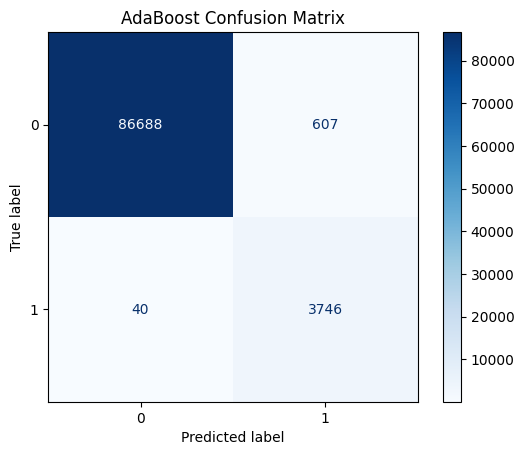

In [21]:
ada = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.25, random_state = 13)

ada.fit(X_train_undersample, y_train_undersample)

ada_pred = ada.predict(X_test)
ada_pred_proba = ada.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, ada_pred)
f1 = f1_score(y_test, ada_pred)
recall = recall_score(y_test, ada_pred)
roc = roc_auc_score(y_test, ada_pred_proba)
cm = confusion_matrix(y_test, ada_pred)

print(f'ADABOOST SCORES:\n'
      f'\tAccuracy: {acc:0.4f}\n'
      f'\tF-1: {f1:0.4f}\n'
      f'\tRecall: {recall:0.4f}\n'
      f'\tRoc: {roc:0.4f}\n\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot(cmap='Blues',)
plt.title("AdaBoost Confusion Matrix")
plt.show()

### LogisticRegression

LOGISTICREGRESSION SCORES:
	Accuracy: 0.9921
	F-1: 0.9123
	Recall: 0.9902
	Roc: 0.9973




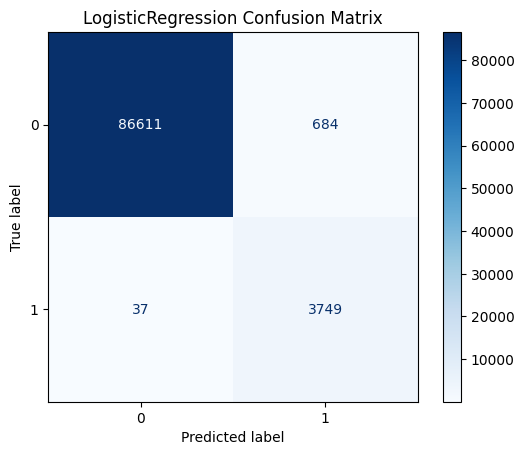

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_undersample, y_train_undersample)

lr_pred = lr.predict(X_test)
lr_pred_prob = lr.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
roc = roc_auc_score(y_test, lr_pred_prob)
cm = confusion_matrix(y_test, lr_pred)

print(f'LOGISTICREGRESSION SCORES:\n'
      f'\tAccuracy: {acc:0.4f}\n'
      f'\tF-1: {f1:0.4f}\n'
      f'\tRecall: {recall:0.4f}\n'
      f'\tRoc: {roc:0.4f}\n\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues',)
plt.title("LogisticRegression Confusion Matrix")
plt.show()

### NaiveBayes

NAIVEBAYES SCORES:
	Accuracy: 0.9732
	F-1: 0.7553
	Recall: 0.9966
	Roc: 0.9963




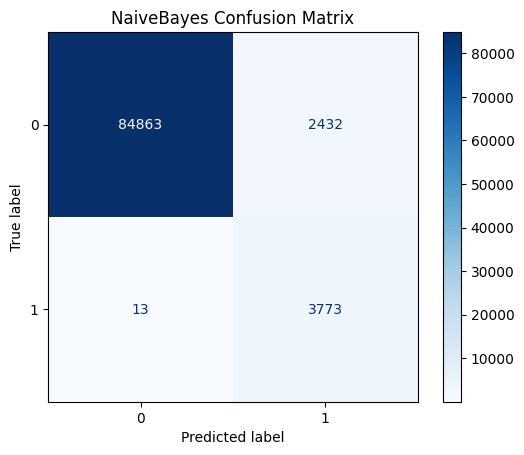

In [23]:
nb = BernoulliNB(alpha=0.001)

nb.fit(X_train_undersample, y_train_undersample)

nb_pred = nb.predict(X_test)
nb_pred_prob = nb.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, nb_pred)
f1 = f1_score(y_test, nb_pred)
recall = recall_score(y_test, nb_pred)
roc = roc_auc_score(y_test, nb_pred_prob)
cm = confusion_matrix(y_test, nb_pred)

print(f'NAIVEBAYES SCORES:\n'
      f'\tAccuracy: {acc:0.4f}\n'
      f'\tF-1: {f1:0.4f}\n'
      f'\tRecall: {recall:0.4f}\n'
      f'\tRoc: {roc:0.4f}\n\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap='Blues',)
plt.title("NaiveBayes Confusion Matrix")
plt.show()